# Bernstein Conference 2023: Additional analyses & plots

In [127]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [139]:
# figs_path = None
figs_path = './bernstein2023_figs'
if not os.path.exists(figs_path):
    os.makedirs(figs_path)

### Fake adjacency matrix

In [140]:
# Create fake adjacency matrix
np.random.seed(1)
tile_size = 10
p_diag = 0.1
p_off = 0.01
n_tiles = 10
adj_tiles = np.ndarray((n_tiles, n_tiles), dtype=object)
for i in range(n_tiles):
    for j in range(n_tiles):
        if -1 <= i - j <= 1:
            p = [1.0 - p_diag, p_diag]
        else:
            p = [1.0 - p_off, p_off]
        adj_tiles[i, j] = np.random.choice(2, size=(tile_size, tile_size), p=p).astype(float)
adj = np.vstack([np.hstack(_adj) for _adj in adj_tiles])
adj[np.diag_indices(adj.shape[0])] = 0.0
adj[adj == 0.0] = np.nan

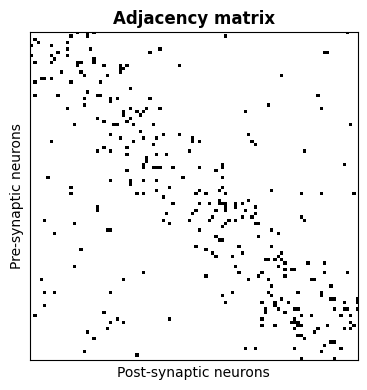

In [141]:
plt.figure(figsize=(6, 4))
plt.imshow(adj, interpolation='nearest', cmap='Greys_r')
plt.xticks([])
plt.yticks([])
plt.xlabel('Post-synaptic neurons')
plt.ylabel('Pre-synaptic neurons')
plt.title('Adjacency matrix', fontweight='bold')
plt.tight_layout()
if figs_path is not None:
    plt.savefig(os.path.join(figs_path, f'adj_matrix_fake.png'), dpi=300)
plt.show()

### Simplified model types

In [144]:
from connectome_manipulator.model_building import model_types

In [142]:
model_files = ['/gpfs/bbp.cscs.ch/project/proj83/home/pokorny/SimplifiedConnectomeModels/model_building_v2/SSCx-HexO1-Release/model/ConnProb1stOrder-SSCxO1-Hex0EE.json',
               '/gpfs/bbp.cscs.ch/project/proj83/home/pokorny/SimplifiedConnectomeModels/model_building_v2/SSCx-HexO1-Release/model/ConnProb2ndOrderComplex-SSCxO1-Hex0EE.json',
               '/gpfs/bbp.cscs.ch/project/proj83/home/pokorny/SimplifiedConnectomeModels/model_building_v2/SSCx-HexO1-Release/model/ConnProb3rdOrderComplex-SSCxO1-Hex0EE.json',
               '/gpfs/bbp.cscs.ch/project/proj83/home/pokorny/SimplifiedConnectomeModels/model_building_v2/SSCx-HexO1-Release/model/ConnProb4thOrder-SSCxO1-Hex0EE.json',
               '/gpfs/bbp.cscs.ch/project/proj83/home/pokorny/SimplifiedConnectomeModels/model_building_v2/SSCx-HexO1-Release/model/ConnProb5thOrder-SSCxO1-Hex0EE.json']


ConnProb1stOrderModel
  p_conn() = 0.010 (constant)


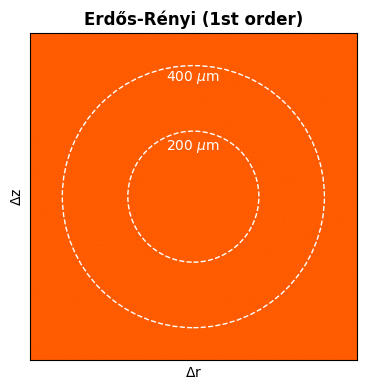

In [175]:
# 1st-order model
model = model_types.AbstractModel.model_from_file(model_files[0])

model_params = model.get_param_dict()
print(model)

plt.figure(figsize=(4, 4))
# plt.figure(figsize=(6, 4))
plot_range = 500 # (um)
r_markers = [200, 400] # (um)
dx = np.linspace(-plot_range, plot_range, 201)
dz = np.linspace(plot_range, -plot_range, 201)
xv, zv = np.meshgrid(dx, dz)
vdist = np.sqrt(xv**2 + zv**2)
pdist = np.full_like(vdist, model.get_conn_prob())
plt.imshow(pdist, interpolation='bilinear', extent=(-plot_range, plot_range, -plot_range, plot_range), cmap=plt.cm.hot, vmin=0.0, vmax=2.0 * model.get_conn_prob())
for r in r_markers:
    plt.gca().add_patch(plt.Circle((0, 0), r, edgecolor='w', linestyle='--', fill=False))
    plt.text(0, r - 4000/r, f'{r} $\\mu$m', color='w', ha='center', va='top')
# plt.text(np.mean(plt.xlim()), np.min(plt.ylim()), f' p = constant = {model.get_conn_prob():.3f}', color='w', ha='center', va='bottom', fontweight='bold')
plt.xticks([])
plt.yticks([])
plt.xlabel('$\\Delta$r')
plt.ylabel('$\\Delta$z')
plt.title('Erdős-Rényi (1st order)', fontweight='bold')
# h_cb = plt.colorbar(label='Conn. prob.', ticks=np.round(model.get_conn_prob() * np.linspace(0, 2, 5), decimals=3))
# h_cb.ax.set_yticklabels(['', '', f'{model.get_conn_prob():.2f}', '', ''])
plt.tight_layout()
if figs_path is not None:
    plt.savefig(os.path.join(figs_path, f'model_order_1.png'), dpi=300)
plt.show()


ConnProb2ndOrderComplexExpModel
  p_conn(d) = 0.084 * exp(-0.000186 * d^1.735) + 0.017 * exp(-0.002 * d)
  d...distance


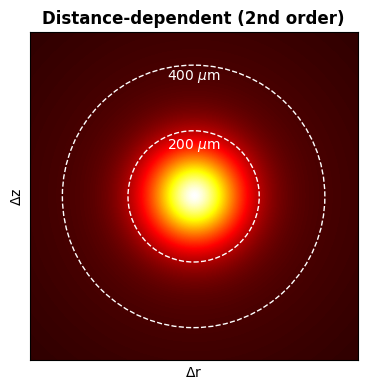

In [176]:
# 2nd-order model
model = model_types.AbstractModel.model_from_file(model_files[1])

model_params = model.get_param_dict()
print(model)

plt.figure(figsize=(4, 4))
# plt.figure(figsize=(6, 4))
plot_range = 500 # (um)
r_markers = [200, 400] # (um)
dx = np.linspace(-plot_range, plot_range, 201)
dz = np.linspace(plot_range, -plot_range, 201)
xv, zv = np.meshgrid(dx, dz)
vdist = np.sqrt(xv**2 + zv**2)
pdist = model.get_conn_prob(vdist)
plt.imshow(pdist, interpolation='bilinear', extent=(-plot_range, plot_range, -plot_range, plot_range), cmap=plt.cm.hot, vmin=0.0)
# plt.plot(np.zeros(2), plt.ylim(), color='lightgrey', linewidth=0.5, alpha=0.5)
# plt.plot(plt.xlim(), np.zeros(2), 'lightgrey', linewidth=0.5, alpha=0.5)
for r in r_markers:
    plt.gca().add_patch(plt.Circle((0, 0), r, edgecolor='w', linestyle='--', fill=False))
    plt.text(0, r - 4000/r, f'{r} $\\mu$m', color='w', ha='center', va='top')
# plt.text(np.mean(plt.xlim()), np.min(plt.ylim()), f' p(d) = {model_params["scale"]:.3f} * exp(-{model_params["exponent"]:.3f} * d)', color='w', ha='center', va='bottom', fontweight='bold')
plt.xticks([])
plt.yticks([])
plt.xlabel('$\\Delta$r')
plt.ylabel('$\\Delta$z')
plt.title('Distance-dependent (2nd order)', fontweight='bold')
# plt.colorbar(label='Conn. prob.')
plt.tight_layout()
if figs_path is not None:
    plt.savefig(os.path.join(figs_path, f'model_order_2.png'), dpi=300)
plt.show()


ConnProb3rdOrderComplexExpModel
  p_conn(d, delta) = 0.087 * exp(-0.000042 * d^2.000) + 0.024 * exp(-0.001 * d) if delta < 0
                     0.081 * exp(-0.001004 * d^1.444) + 0.013 * exp(-0.003 * d) if delta > 0
                     AVERAGE OF BOTH MODELS  if delta == 0
  d...distance, delta...difference (tgt minus src) in coordinate 2


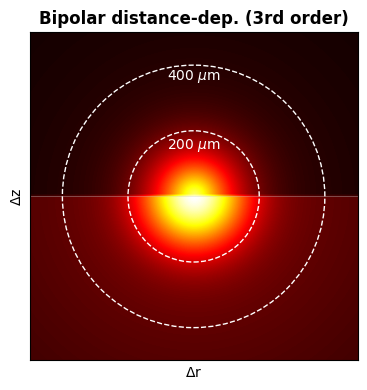

In [177]:
# 3rd-order model
model = model_types.AbstractModel.model_from_file(model_files[2])

model_params = model.get_param_dict()
print(model)

plt.figure(figsize=(4, 4))
# plt.figure(figsize=(6, 4))
plot_range = 500 # (um)
r_markers = [200, 400] # (um)
dx = np.linspace(-plot_range, plot_range, 201)
dz = np.linspace(plot_range, -plot_range, 201)
xv, zv = np.meshgrid(dx, dz)
vdist = np.sqrt(xv**2 + zv**2)
pdist = model.get_conn_prob(vdist, np.sign(zv))
plt.imshow(pdist, interpolation='bilinear', extent=(-plot_range, plot_range, -plot_range, plot_range), cmap=plt.cm.hot, vmin=0.0)
# plt.plot(np.zeros(2), plt.ylim(), color='lightgrey', linewidth=0.5, alpha=0.5)
plt.plot(plt.xlim(), np.zeros(2), 'lightgrey', linewidth=0.5, alpha=0.5)
for r in r_markers:
    plt.gca().add_patch(plt.Circle((0, 0), r, edgecolor='w', linestyle='--', fill=False))
    plt.text(0, r - 4000/r, f'{r} $\\mu$m', color='w', ha='center', va='top')
# plt.text(np.mean(plt.xlim()), np.max(plt.ylim()), f' p(d) = {model_params["scale_P"]:.3f} * exp(-{model_params["exponent_P"]:.3f} * d) if $\\bf\\Delta$z > 0', color='w', ha='center', va='top', fontweight='bold')
# plt.text(np.mean(plt.xlim()), np.min(plt.ylim()), f' p(d) = {model_params["scale_N"]:.3f} * exp(-{model_params["exponent_N"]:.3f} * d) if $\\bf\\Delta$z < 0', color='w', ha='center', va='bottom', fontweight='bold')
plt.xticks([])
plt.yticks([])
plt.xlabel('$\\Delta$r')
plt.ylabel('$\\Delta$z')
plt.title('Bipolar distance-dep. (3rd order)', fontweight='bold')
# plt.colorbar(label='Conn. prob.')
plt.tight_layout()
if figs_path is not None:
    plt.savefig(os.path.join(figs_path, f'model_order_3.png'), dpi=300)
plt.show()


ConnProb4thOrderLinInterpnReducedModel
  p_conn(dr, dz) = LINEAR INTERPOLATION FROM DATA TABLE (396 entries; dr(9): 25.00..425.00, dz(44): -1525.00..625.00)
  dr/dz...radial/axial position offset (tgt minus src), with axial coordinate 2


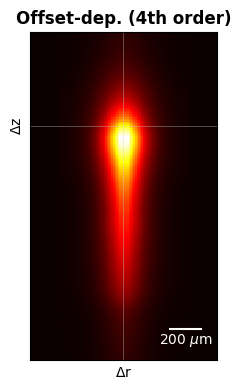

In [178]:
# 4th-order model
model = model_types.AbstractModel.model_from_file(model_files[3])

model_params = model.get_param_dict()
print(model)

dr_bin_size = dz_bin_size = 10
dr_bins = np.arange(0, 601, dr_bin_size)
dz_bins = np.arange(-1500, 601, dz_bin_size)

# Sample positions (at bin centers)
dr_pos = dr_bins[:-1] + 0.5 * dr_bin_size
dz_pos = dz_bins[:-1] + 0.5 * dz_bin_size

# Model probability at sample positions
drv, dzv = np.meshgrid(dr_pos, dz_pos, indexing='ij')
model_pos = np.array([drv.flatten(), dzv.flatten()]).T # Regular grid
model_val = model.get_conn_prob(model_pos[:, 0], model_pos[:, 1])
model_val = model_val.reshape([len(dr_pos), len(dz_pos)])

plt.figure(figsize=(4, 4))
# plt.figure(figsize=(6, 4))
plt.imshow(np.hstack([model_val.T[:, ::-1], model_val.T]), interpolation='nearest', extent=(-dr_bins[-1], dr_bins[-1], dz_bins[-1], dz_bins[0]), cmap=plt.cm.hot, vmin=0.0)
plt.plot(np.zeros(2), plt.ylim(), color='lightgrey', linewidth=0.5, alpha=0.5)
plt.plot(plt.xlim(), np.zeros(2), 'lightgrey', linewidth=0.5, alpha=0.5)
bar_x = [300, 500]
bar_y = -1300
plt.plot(bar_x, [bar_y] * 2, 'w-')
plt.text(np.mean(bar_x), bar_y - 20, f'{np.diff(bar_x)[0]} $\\mu$m', color='w', ha='center', va='top')
plt.plot()
plt.gca().invert_yaxis()
plt.xticks([])
plt.yticks([])
plt.xlabel('$\\Delta$r')
plt.ylabel(' ' * 32 + '$\\Delta$z')
# plt.colorbar(label='Conn. prob.')
plt.title('Offset-dep. (4th order)', fontweight='bold')

plt.tight_layout()
if figs_path is not None:
    plt.savefig(os.path.join(figs_path, f'model_order_4.png'), dpi=300)
plt.show()


ConnProb5thOrderLinInterpnReducedModel
  p_conn(z, dr, dz) = LINEAR INTERPOLATION FROM DATA TABLE (5148 entries; z(13): -2300.00..100.00, dr(9): 25.00..425.00, dz(44): -1525.00..625.00)
  z...axial src position, dr/dz...radial/axial position offset (tgt minus src), with axial coordinate 2


/nvme/pokorny/1724367/ipykernel_289282/4002993660.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


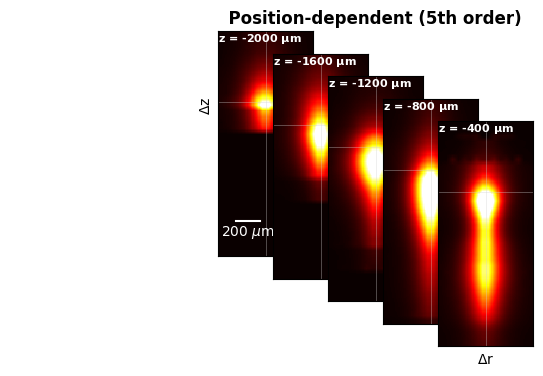

In [179]:
# 5th-order model
model = model_types.AbstractModel.model_from_file(model_files[4])

model_params = model.get_param_dict()
print(model)

z_pos_list = np.arange(-2000, 0, 400)

x_step = 0.11
y_step = 0.05
p_max = np.round(np.max(model.p_conn_table.to_numpy()), decimals=1)
ax_list = []

plt.figure(figsize=(5, 4.5))
# plt.figure(figsize=(6, 4.5))
for zi in range(len(z_pos_list)):
#     ax_list.append(plt.axes([0.1 + (len(z_pos_list) - 1 - zi) * x_step, 0.1 + y_step * zi, 0.5, 0.5]))
    ax_list.append(plt.axes([0.1 + zi * x_step, 0.1 + (len(z_pos_list) - 1 - zi) * y_step, 0.4, 0.5]))
#     plt.subplot(1, len(z_pos_list), zi + 1)
    z_pos = [z_pos_list[zi]]

    dr_bin_size = dz_bin_size = 10
    dr_bins = np.arange(0, 401, dr_bin_size)
    dz_bins = np.arange(-1300, 601, dz_bin_size)

    # Sample positions (at bin centers)
    dr_pos = dr_bins[:-1] + 0.5 * dr_bin_size
    dz_pos = dz_bins[:-1] + 0.5 * dz_bin_size

    # Model probability at sample positions
    zv, drv, dzv = np.meshgrid(z_pos, dr_pos, dz_pos, indexing='ij')
    model_pos = np.array([zv.flatten(), drv.flatten(), dzv.flatten()]).T # Regular grid
    model_val = model.get_conn_prob(model_pos[:, 0], model_pos[:, 1], model_pos[:, 2])
    model_val = model_val.reshape([len(z_pos), len(dr_pos), len(dz_pos)])

    plt.imshow(np.hstack([model_val.T[:, ::-1], model_val.T]), interpolation='nearest', extent=(-dr_bins[-1], dr_bins[-1], dz_bins[-1], dz_bins[0]), cmap=plt.cm.hot, vmin=0.0, vmax=p_max)
    plt.plot(np.zeros(2), plt.ylim(), color='lightgrey', linewidth=0.5, alpha=0.5)
    plt.plot(plt.xlim(), np.zeros(2), 'lightgrey', linewidth=0.5, alpha=0.5)
    if zi == 0:
        plt.title(' ' * 38 + 'Position-dependent (5th order)', fontweight='bold')
        plt.ylabel(' ' * 18 + '$\\Delta$z')
        bar_x = [-250, -50]
        bar_y = -1000
        plt.plot(bar_x, [bar_y] * 2, 'w-')
        plt.text(np.mean(bar_x), bar_y - 20, f'{np.diff(bar_x)[0]} $\\mu$m', color='w', ha='center', va='top')
    plt.gca().invert_yaxis()
    plt.text(np.min(plt.xlim()), np.max(plt.ylim()), f'z = {z_pos_list[zi]} $\\bf\\mu$m', color='w', fontsize=8, ha='left', va='top', fontweight='bold')
    plt.xticks([])
    plt.yticks([])
    if zi == len(z_pos_list) - 1:
        plt.xlabel('$\\Delta$r')
        
# plt.colorbar(ax=ax_list, label='Conn. prob.', pad=0.02)

plt.tight_layout()
if figs_path is not None:
    plt.savefig(os.path.join(figs_path, f'model_order_5.png'), dpi=300)
plt.show()


In [ ]:
# Trim PNGs
# mogrify -trim *.png